# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Business Objectives 
Recommendation to buy a used car

There are several factor that make car more or less expensive :
1. Condition
3. Cylinders
4. Fuel
5. Odometer
6. Title_status
7. Type
8. Size

Data Mining Goals:
What factors make car more or less expensive ?

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Import Library

In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

Data Description

In [3]:
df = pd.read_csv('data/vehicles.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


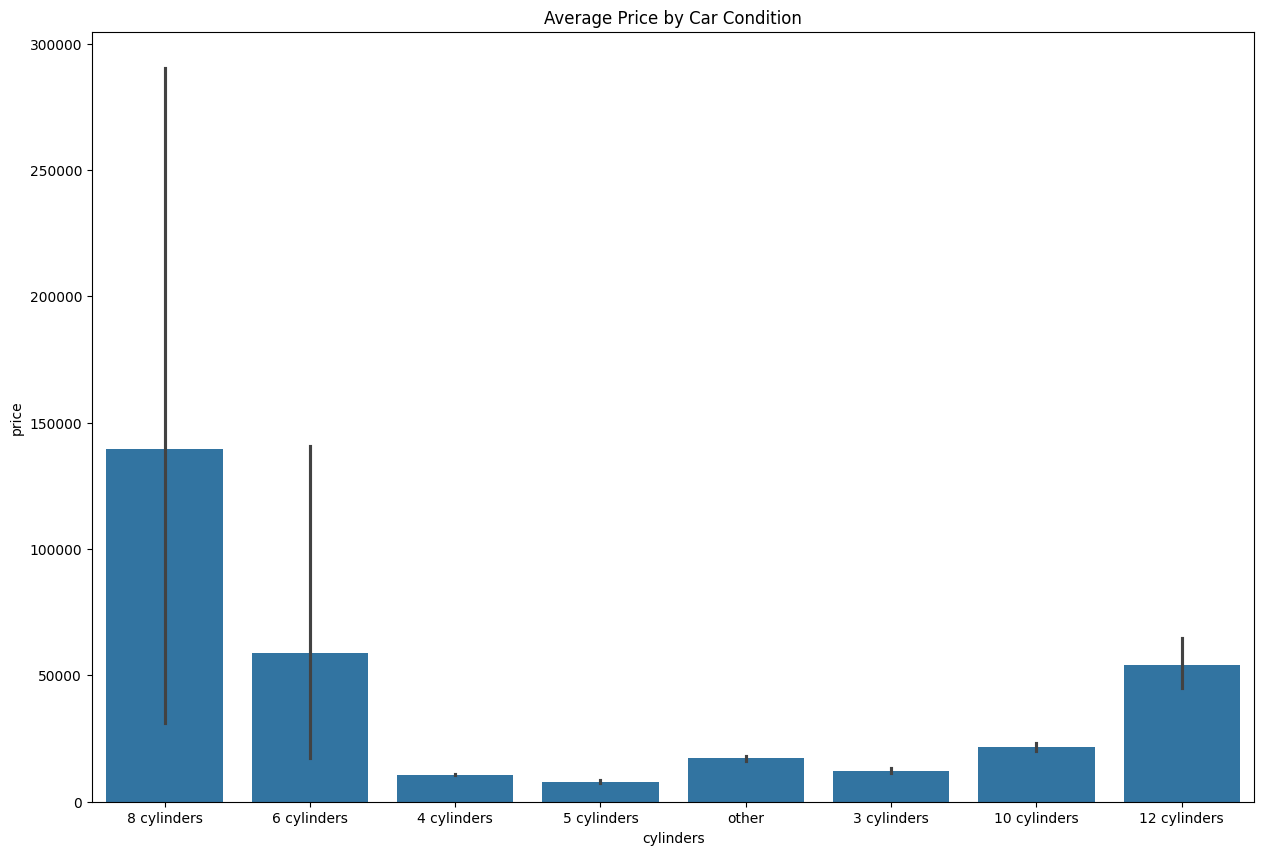

In [ ]:
#Visualization between condition and price
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x='cylinders', y='price')
plt.title("Average Price by Car Cylinders")
plt.show()


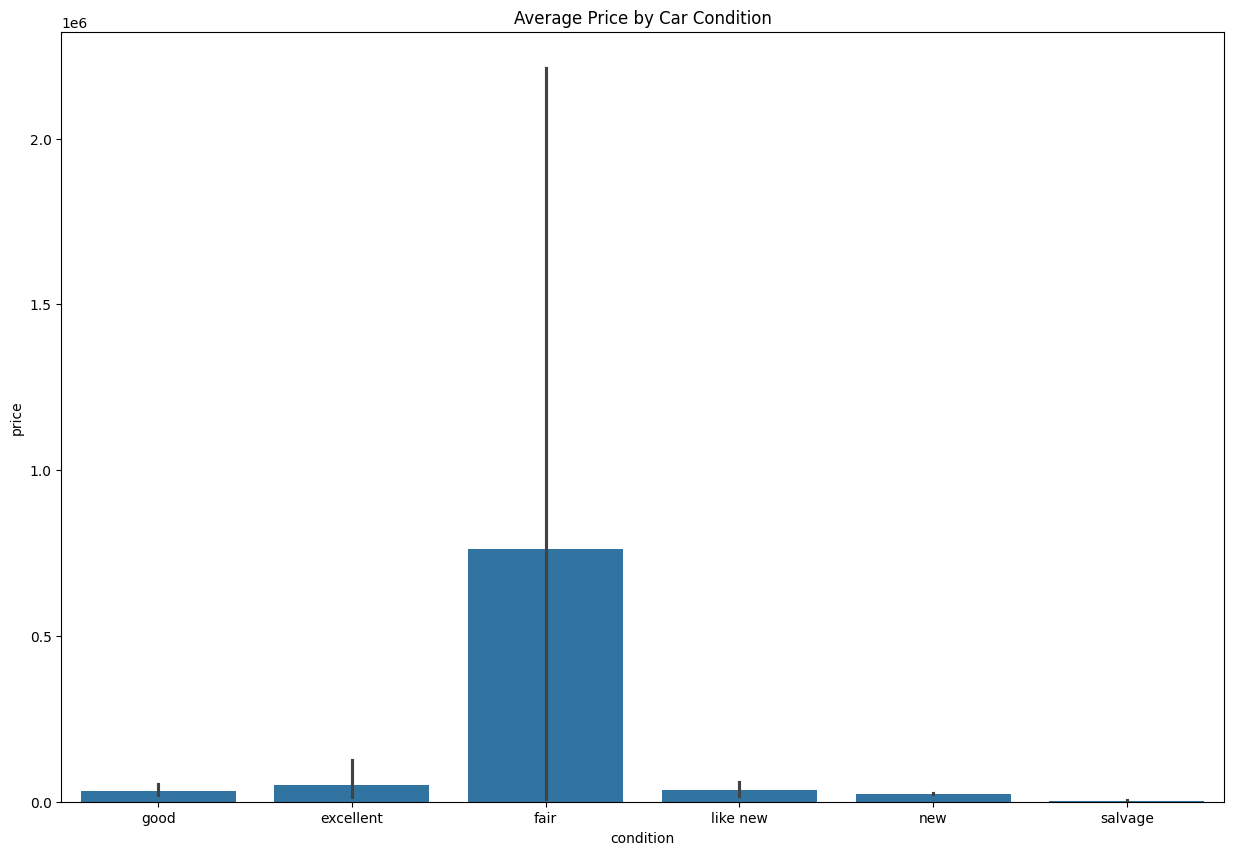

In [24]:
#Visualization between condition and price
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x='condition', y='price')
plt.title("Average Price by Car Condition")
plt.show()


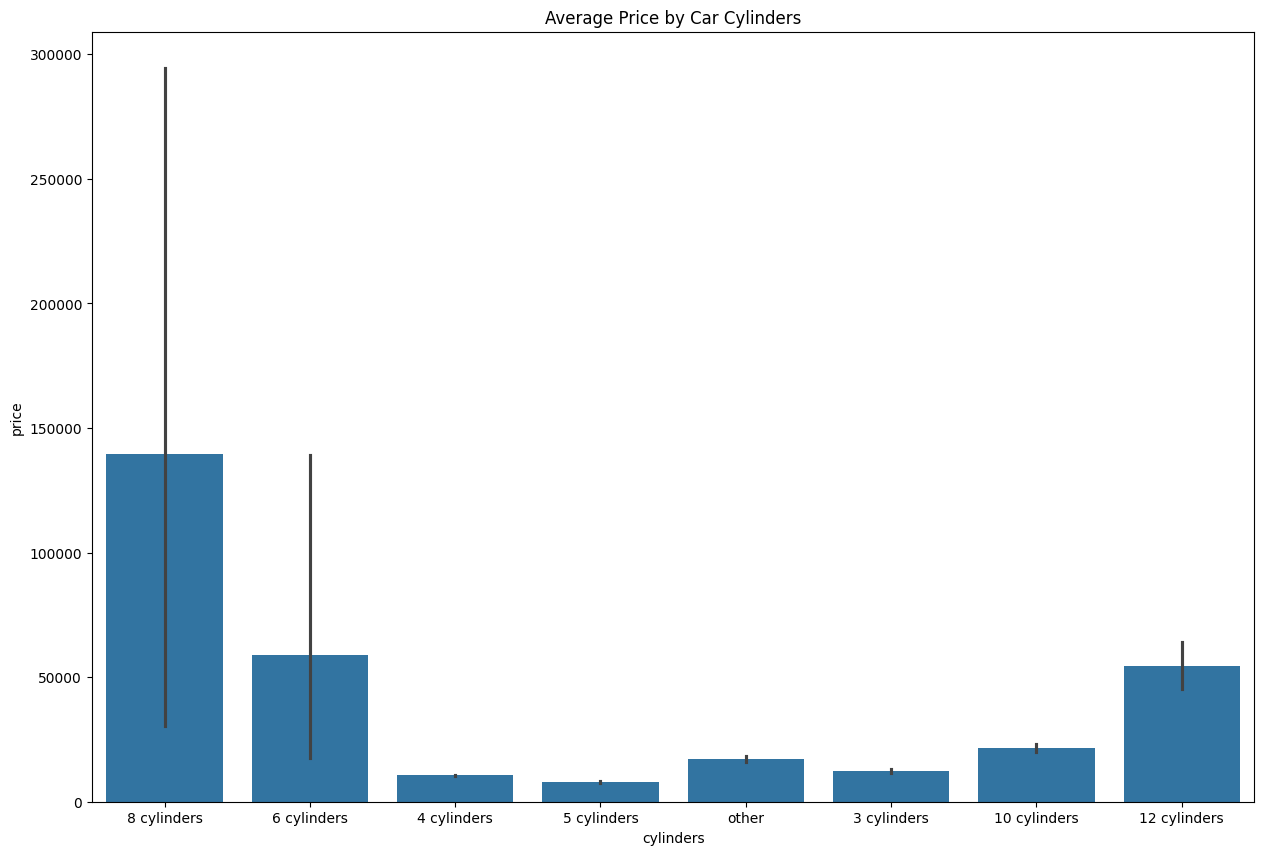

In [25]:
#Visualization between cylinders and price
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x='cylinders', y='price')
plt.title("Average Price by Car Cylinders")
plt.show()

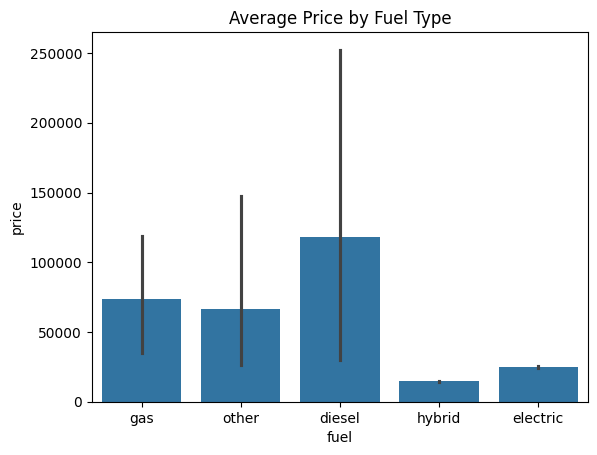

In [26]:
#Visualization between fuel type and price
sns.barplot(data=df, x='fuel', y='price')
plt.title("Average Price by Fuel Type")
plt.show()


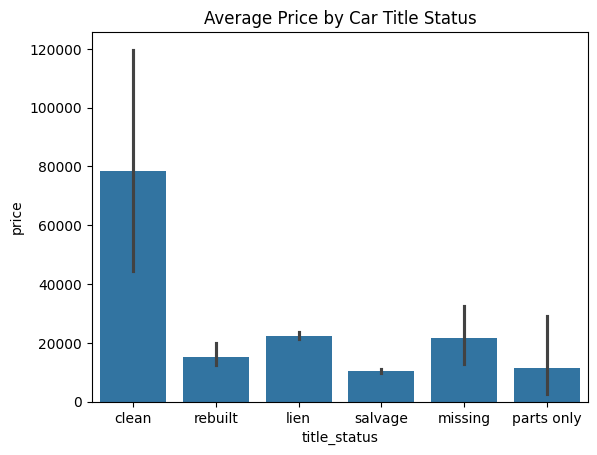

In [27]:
#Visualization between title status and price
sns.barplot(data=df, x='title_status', y='price')
plt.title("Average Price by Car Title Status")
plt.show()

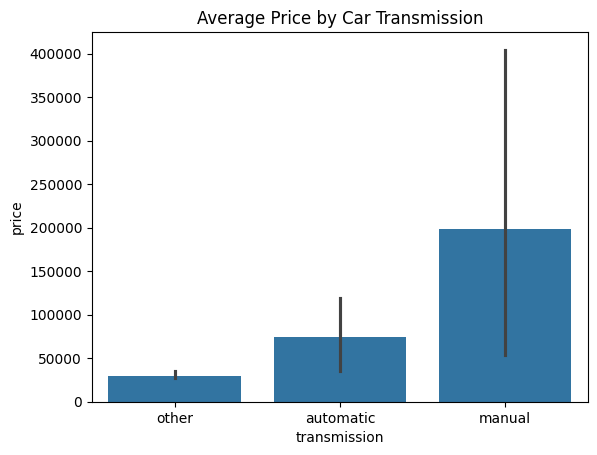

In [28]:
#Visualization between transmission and price
sns.barplot(data=df, x='transmission', y='price')
plt.title("Average Price by Car Transmission")
plt.show()


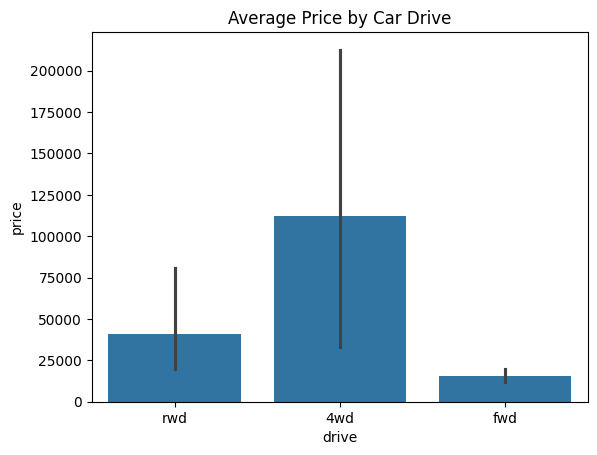

In [29]:
#Visualization between drive and price
sns.barplot(data=df, x='drive', y='price')
plt.title("Average Price by Car Drive")
plt.show()

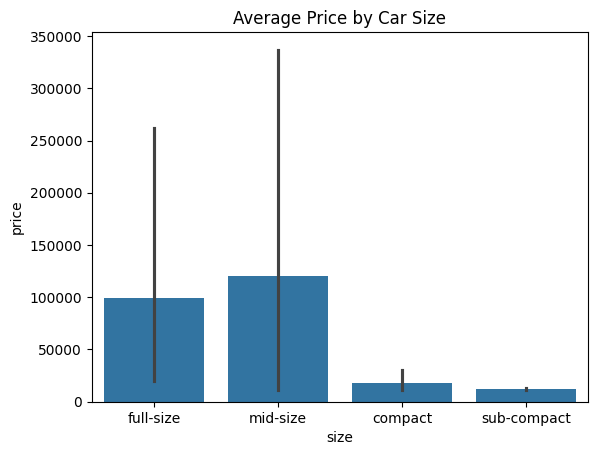

In [30]:
#Visualization between size and price
sns.barplot(data=df, x='size', y='price')
plt.title("Average Price by Car Size")
plt.show()


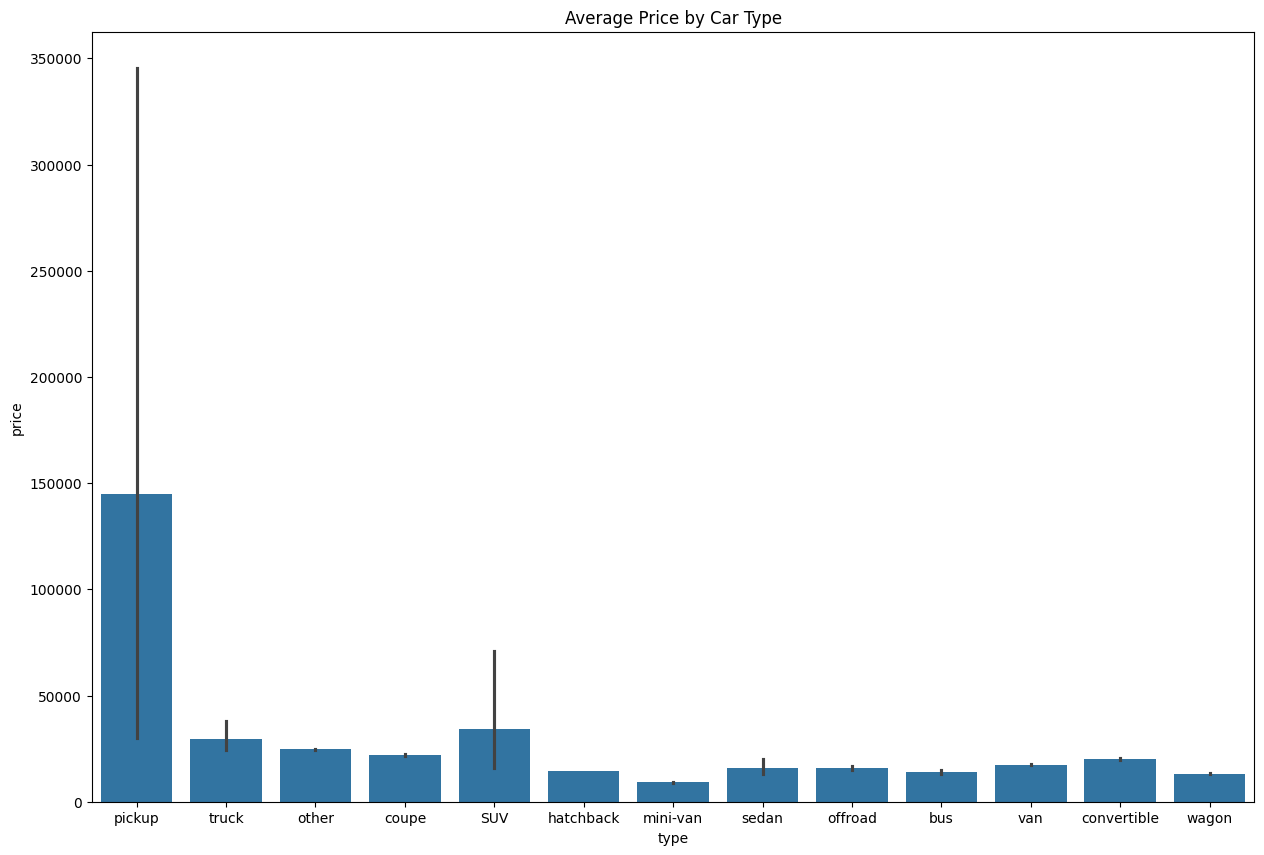

In [31]:
#Visualization between type and price
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x='type', y='price')
plt.title("Average Price by Car Type")
plt.show()


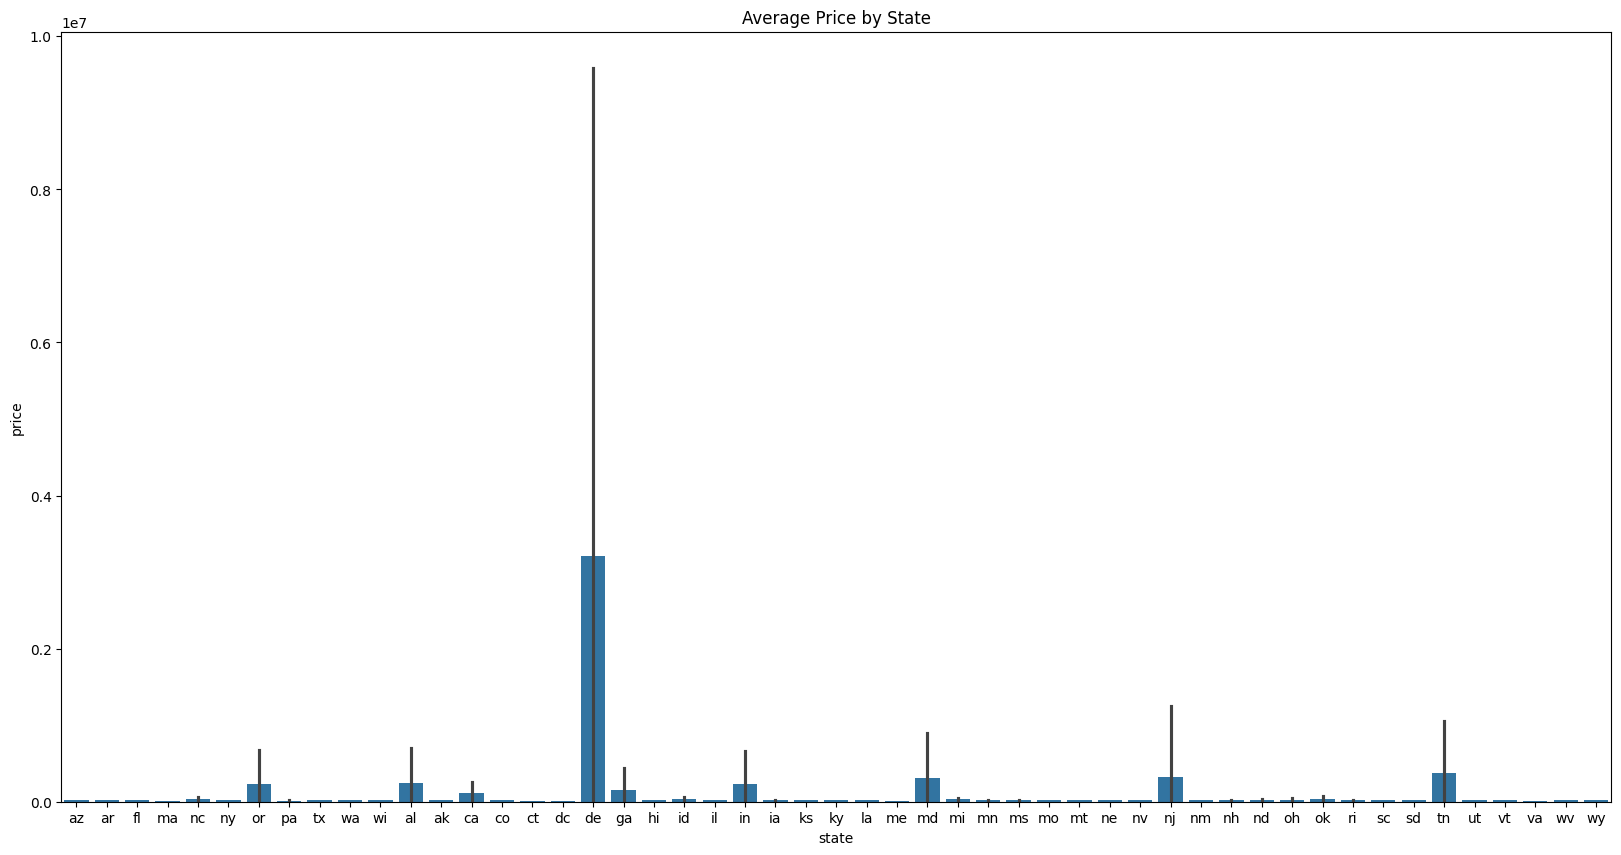

In [32]:
#Visualization between state and price
plt.figure(figsize=(20, 10))
sns.barplot(data=df, x='state', y='price')
plt.title("Average Price by State")
plt.show()


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Data Cleaning

In [8]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [9]:
df.columns = df.columns.str.lower() # lowercase
df.columns = df.columns.str.strip() # whitespace
df.columns = df.columns.str.replace(" ", "_") # replace with _

In [10]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'vin',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

Duplicate Check

In [11]:
sum(df.duplicated())

0

In [12]:
# Check Null Value
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
vin             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [13]:
df.isnull().mean() * 100 # Percentage of missing values

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
vin             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

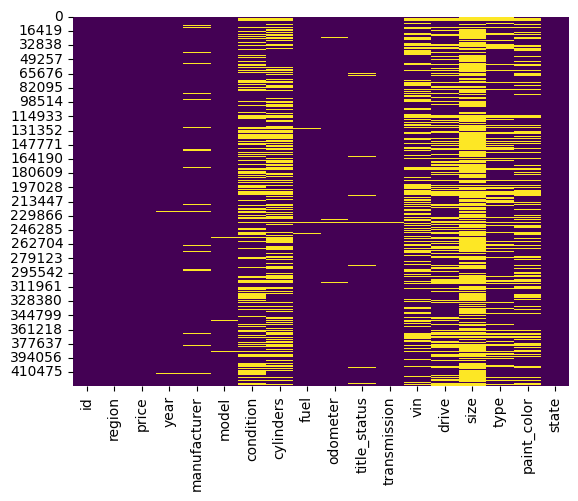

In [14]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

After seeing the column that has a null value, My summary using threshold 50%: 
1. column 'size', 'model' will be drop 
2. column 'odometer' will use median value 
3. column 'transmission', 'title_status', 'condition', 'fuel', 'cylinders' will use mod value
4. column 'year' gonna replace with 0
5. column 'manufacturer', 'VIN', 'type', 'paint_color' gonna replace with Unknown

In [15]:
#Dropping column size
df = df.drop(['size','model'], axis = 1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  vin           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 52.1+ MB


In [16]:
#Replacing missing value with mean on column odometer
df['odometer'].fillna(df['odometer'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      426880 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  vin           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 52.1+ MB


/var/folders/mv/1vlspr7x6vb_56hxg0jfrcy00000gn/T/ipykernel_1442/2406446664.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['odometer'].fillna(df['odometer'].median(), inplace=True)


In [17]:
#replacing missing value on column transmission, title_status, condition, fuel, cylinders with mode value
df['transmission'].fillna(df['transmission'].mode()[0], inplace=True)
df['title_status'].fillna(df['title_status'].mode()[0], inplace=True)
df['condition'].fillna(df['condition'].mode()[0], inplace=True)
df['fuel'].fillna(df['fuel'].mode()[0], inplace=True)
df['cylinders'].fillna(df['cylinders'].mode()[0], inplace=True)
df['drive'].fillna(df['drive'].mode()[0], inplace=True)

df.info()

/var/folders/mv/1vlspr7x6vb_56hxg0jfrcy00000gn/T/ipykernel_1442/3774642959.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['transmission'].fillna(df['transmission'].mode()[0], inplace=True)
/var/folders/mv/1vlspr7x6vb_56hxg0jfrcy00000gn/T/ipykernel_1442/3774642959.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   condition     426880 non-null  object 
 6   cylinders     426880 non-null  object 
 7   fuel          426880 non-null  object 
 8   odometer      426880 non-null  float64
 9   title_status  426880 non-null  object 
 10  transmission  426880 non-null  object 
 11  vin           265838 non-null  object 
 12  drive         426880 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 52.1+ MB


In [43]:
df['year'].fillna(0, inplace=True)  # Replace missing values on column year with 0
df['manufacturer'].fillna('Unknown', inplace=True)  # Replace missing values on column manufacturer with Unknown
df['VIN'].fillna('Unknown', inplace=True)  # Replace missing values on column VIN with Unknown
df['model'].fillna('Unknown', inplace=True)  # Replace missing values on column model with Unknown
df['type'].fillna('Unknown', inplace=True)  # Replace missing values on column type with Unknown
df['paint_color'].fillna('Unknown', inplace=True)  # Replace missing values on column paint_color with Unknown
df.info()

/var/folders/mv/1vlspr7x6vb_56hxg0jfrcy00000gn/T/ipykernel_94058/956546820.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(0, inplace=True)  # Replace missing values on column year with 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          426880 non-null  float64
 4   manufacturer  426880 non-null  object 
 5   model         426880 non-null  object 
 6   condition     426880 non-null  object 
 7   cylinders     426880 non-null  object 
 8   fuel          426880 non-null  object 
 9   odometer      426880 non-null  float64
 10  title_status  426880 non-null  object 
 11  transmission  426880 non-null  object 
 12  VIN           426880 non-null  object 
 13  drive         426880 non-null  object 
 14  type          426880 non-null  object 
 15  paint_color   426880 non-null  object 
 16  state         426880 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage

Feature Engineering

Outlier Treatment

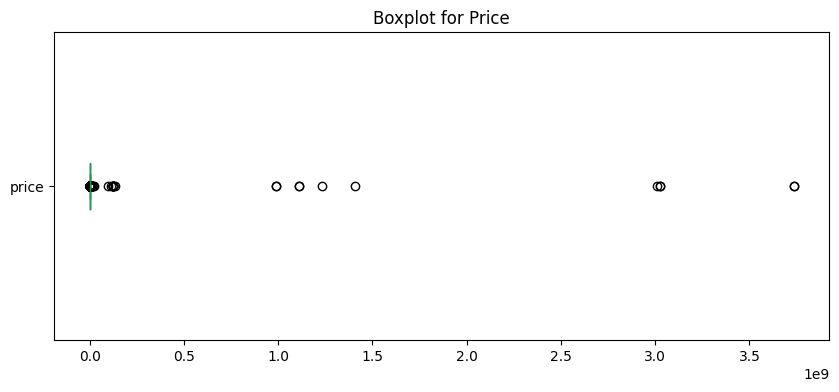

In [24]:
df['price'].plot(kind='box', vert=False, figsize=(10, 4))
plt.title("Boxplot for Price")
plt.show()

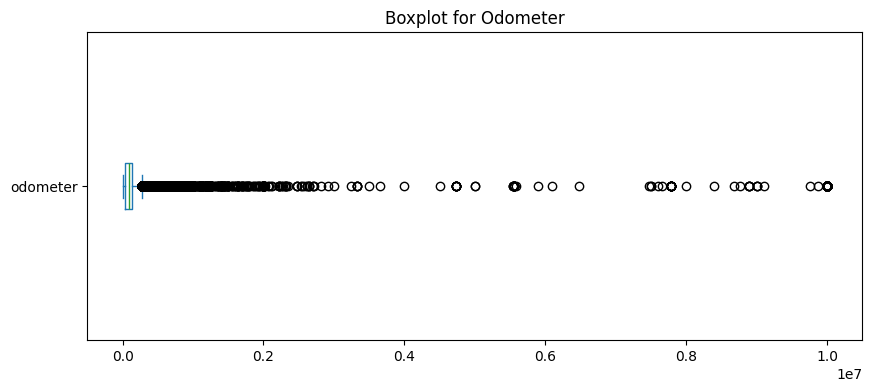

In [25]:
df['odometer'].plot(kind='box', vert=False, figsize=(10, 4))
plt.title("Boxplot for Odometer")
plt.show()

In [28]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values outside the bounds
df['price'] = df['price'].clip(lower=lower_bound, upper=upper_bound)

Splitting Data

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Regression Analysis

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Metrics for Regression

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Visualization

Report Findings